In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA



In [22]:
df = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/monthly-milk-production-pounds-p.csv")
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


H0 : the time series is non stationary.
H1 : the time series is stationary.

In [29]:
def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag=None)
    adfuller_out = pd.Series(adfuller_result[0:4],
    index =[ 'Test Statistic', 'p-value', 'Lags Used', 
    'Number of Observations Used'])
    print(adfuller_out)
    
adfuller_test(df['Milk'])

Test Statistic                  -1.221106
p-value                          0.664451
Lags Used                       14.000000
Number of Observations Used    153.000000
dtype: float64


## Auto Correlation

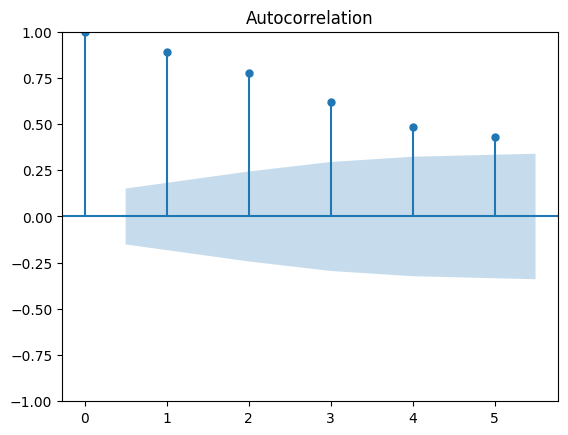

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Milk'], lags=5)
plt.show()

In [31]:
coal = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/Coal Consumption.csv")
coal.head()

,Month,Amount
0,Jan-90,16.50
1,Feb-90,15.17
2,Mar-90,12.75
3,Apr-90,12.31
4,May-90,8.34


In [33]:
adfuller_test(coal['Amount'])

Test Statistic                  -1.713508
p-value                          0.424166
Lags Used                       13.000000
Number of Observations Used    118.000000
dtype: float64


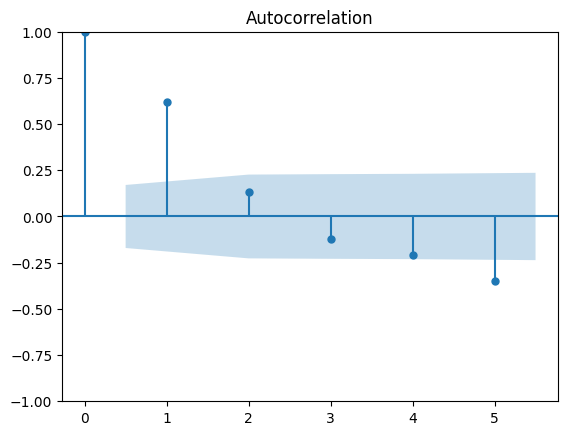

In [35]:
plot_acf(coal['Amount'], lags=5)
plt.show()

In [39]:
####### Auto Reg ##############
from statsmodels.tsa.ar_model import AutoReg
y = df['Milk']
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
model = AutoReg(y_train, lags=3)
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)

print("MSE =",mse(y_test, predictions))

Coefficients: const      112.559667
Milk.L1      0.947108
Milk.L2      0.234994
Milk.L3     -0.331856
dtype: float64
MSE = 11853.81424667359


In [40]:
############### ARMA ######################################
# 1st order AR, 2nd order MA
model = ARIMA(y_train,order=(1,0,2))
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)
print("MSE =",mse(y_test, predictions)) 




Coefficients: const      746.385794
ar.L1        0.789823
ma.L1        0.194306
ma.L2        0.515378
sigma2    1568.263728
dtype: float64
MSE = 11157.75877287437


In [41]:
############### ARIMA ######################################
# 1st order AR, 1st order Diff, 2nd order MA
model = ARIMA(y_train,order=(1,1,2))
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)
print("MSE =",mse(y_test, predictions)) 



Coefficients: ar.L1       -0.216067
ma.L1        0.282827
ma.L2        0.491660
sigma2    1712.400406
dtype: float64
MSE = 5001.569179055378


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.691, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1571.971, Time=0.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1579.423, Time=0.33 s

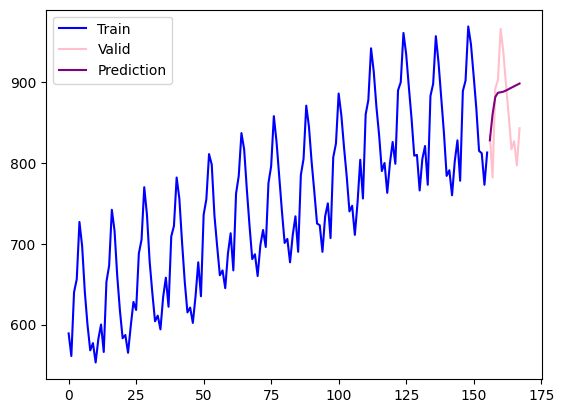

In [43]:
########### pmdarima ##############################

from pmdarima.arima import auto_arima

########## ARIMA ####################
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])
print("MSE =",mse(y_test, forecast)) 

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=3.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.66 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=2.16 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.33 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=4.73 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=1.81 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=8.30 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=1.20 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.24 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=1.72 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=2.95 sec
 ARIMA(1,0,2)(1,1,0)[12] int

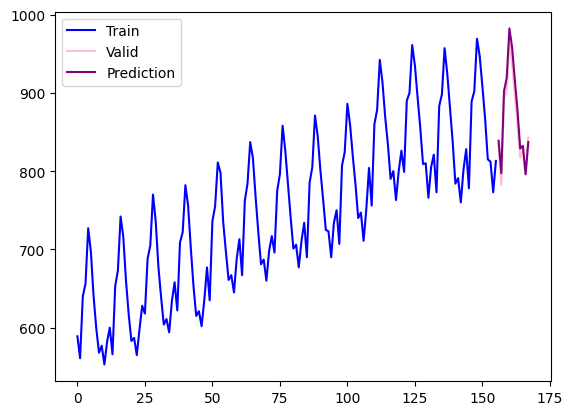

In [44]:
############# SARIMA ################
model = auto_arima(y_train, trace=True,seasonal=True,m=12,
                   error_action='ignore', 
                   suppress_warnings=True)
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])
print("MSE =",mse(y_test, forecast)) 

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()
